# Proyek Analisis Data: E Commerce
- Nama: Nabila Shafa Oktavia
- Email: nbilashafaru@gmail.com
- Id Dicoding: nbilashf

## Menentukan Pertanyaan Bisnis ✈

- Kota mana yang memiliki pelanggan terdaftar terbanyak dan bagaimana performa pembelian produknya
- Bagaimana kontribusi revenue 5 state teratas terhadap keseluruhan state
- Analisis Lanjutan :
Segmentasi customer berdasarkan RFM analysis

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

## Data Wrangling

### Gathering Data

In [ ]:
!pip install opendatasets
import opendatasets as od

od.download(
	"https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ipkcumlaudeaamiin
Your Kaggle Key: ··········


100%|██████████| 42.6M/42.6M [00:00<00:00, 109MB/s]


In [ ]:

custdf = pd.read_csv('customers_dataset.csv', delimiter=',')

# Tampilkan lima baris pertama dari dataframe
custdf.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP


In [ ]:
geodf = pd.read_csv('geolocation_dataset.csv', delimiter=",")
geodf.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
344899,14960,-21.466641,-49.222428,novo horizonte,SP
344900,14900,-21.596185,-48.815012,itapolis,SP
344901,14960,-21.468774,-49.222675,novo horizonte,SP
344902,14900,-21.599867,-48.823058,itapolis,SP
344903,14935,-22.039651,-48.330000,NaN,NaN


In [ ]:
orderdf = pd.read_csv('orders_dataset.csv', delimiter=",")
orderdf.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [ ]:
reviewdf = pd.read_csv('order_reviews_dataset.csv', delimiter=',')
reviewdf.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orderitmdf = pd.read_csv("order_items_dataset.csv", delimiter=",")
orderitmdf.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
productdf = pd.read_csv("products_dataset.csv", delimiter=",")
productdf.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
paymentdf = pd.read_csv("order_payments_dataset.csv", delimiter=",")
paymentdf.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [ ]:
productnamedf = pd.read_csv("product_category_name_translation.csv", delimiter=",")
productnamedf.tail()

,product_category_name,product_category_name_english
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services


### Assessing Data

###Order Dataframe

In [ ]:
orderdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orderdf.isnull().sum() #terdapat data yang kosong

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orderdf.duplicated().sum()

0

###Customer Dataframe

In [ ]:
custdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34626 entries, 0 to 34625
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               34626 non-null  object 
 1   customer_unique_id        34626 non-null  object 
 2   customer_zip_code_prefix  34625 non-null  float64
 3   customer_city             34625 non-null  object 
 4   customer_state            34625 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
custdf.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    1
customer_city               1
customer_state              1
dtype: int64

In [ ]:
custdf.duplicated().sum()

0

###Payment Dataframe

In [ ]:
paymentdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
paymentdf.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
paymentdf.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
103881    False
103882    False
103883    False
103884    False
103885    False
Length: 103886, dtype: bool

In [ ]:
paymentdf.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

### Cleaning Data

####Memperbaiki tipe data yang tidak sesuai

In [ ]:
datetime_columns = ["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date", "order_delivered_carrier_date"]

for column in datetime_columns:
  orderdf[column] = pd.to_datetime(orderdf[column])

orderdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


####Menghilangkan column yang tidak diperlukan

In [ ]:
orderdf = orderdf.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], axis=1)


## Exploratory Data Analysis (EDA)

### Mulai mencari revenue rate

In [ ]:
orderdf.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
custdf.customer_state.value_counts()

SP    14490
RJ     4583
MG     4081
RS     1889
PR     1755
SC     1237
BA     1165
DF      737
ES      713
GO      704
PE      548
CE      458
PA      343
MT      335
MA      250
MS      249
PB      177
AL      158
RN      157
PI      153
SE      135
TO      101
RO       87
AM       43
AC       32
AP       25
RR       20
Name: customer_state, dtype: int64

In [ ]:
revenuedf = pd.merge(orderdf, custdf, how='left', on='customer_id')
revenuedf = pd.merge(revenuedf, paymentdf, how='left', on='order_id')
revenuedf

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,NaN,NaN,NaN,NaN,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,NaN,NaN,NaN,NaN,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,NaN,NaN,NaN,NaN,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-28,NaN,NaN,NaN,NaN,1.0,credit_card,3.0,85.08
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02,NaN,NaN,NaN,NaN,1.0,credit_card,3.0,195.00
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920.0,nova vicosa,BA,1.0,credit_card,5.0,271.01
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ,1.0,credit_card,4.0,441.16


In [ ]:
revenuedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   customer_id                    103887 non-null  object        
 2   order_status                   103887 non-null  object        
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_estimated_delivery_date  103887 non-null  datetime64[ns]
 5   customer_unique_id             36201 non-null   object        
 6   customer_zip_code_prefix       36200 non-null   float64       
 7   customer_city                  36200 non-null   object        
 8   customer_state                 36200 non-null   object        
 9   payment_sequential             103886 non-null  float64       
 10  payment_type                   103886 non-null  object        
 11  

In [ ]:
revenuedf.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_estimated_delivery_date        0
customer_unique_id               67686
customer_zip_code_prefix         67687
customer_city                    67687
customer_state                   67687
payment_sequential                   1
payment_type                         1
payment_installments                 1
payment_value                        1
dtype: int64

###Dataframe untuk data demografi

In [ ]:
custdemodf = pd.merge(orderdf, custdf, how='left', on='customer_id')
custdemodf = pd.merge(custdemodf, paymentdf, how='left', on='order_id')
custdemodf = pd.merge(custdemodf, orderitmdf, how=('left'), on='order_id')
producteng = pd.merge(productdf, productnamedf, how='left', on='product_category_name')
custdemodf = pd.merge(custdemodf, producteng, how='left', on='product_id')
custdemodf

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,NaN,NaN,NaN,NaN,1.0,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,NaN,NaN,NaN,NaN,3.0,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,NaN,NaN,NaN,NaN,2.0,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,NaN,NaN,NaN,NaN,1.0,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,1.0,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02,NaN,NaN,NaN,NaN,1.0,...,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920.0,nova vicosa,BA,1.0,...,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ,1.0,...,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685.0,japuiba,RJ,1.0,...,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [ ]:
custdemodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118434 non-null  object        
 1   customer_id                    118434 non-null  object        
 2   order_status                   118434 non-null  object        
 3   order_purchase_timestamp       118434 non-null  datetime64[ns]
 4   order_estimated_delivery_date  118434 non-null  datetime64[ns]
 5   customer_unique_id             41323 non-null   object        
 6   customer_zip_code_prefix       41322 non-null   float64       
 7   customer_city                  41322 non-null   object        
 8   customer_state                 41322 non-null   object        
 9   payment_sequential             118431 non-null  float64       
 10  payment_type                   118431 non-null  object        
 11  

In [ ]:
custdemodf.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_estimated_delivery_date        0
customer_unique_id               77111
customer_zip_code_prefix         77112
customer_city                    77112
customer_state                   77112
payment_sequential                   3
payment_type                         3
payment_installments                 3
payment_value                        3
order_item_id                      830
product_id                         830
seller_id                          830
shipping_limit_date                830
price                              830
freight_value                      830
product_category_name             2528
product_name_lenght               2528
product_description_lenght        2528
product_photos_qty                2528
product_weight_g                   850
product_length_cm                  850
product_height_cm        

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota mana yang memiliki pelanggan terdaftar terbanyak dan bagaimana performa pembelian produknya

In [ ]:
totalcust = custdf.groupby(by="customer_state").customer_id.nunique().reset_index()
totalcust.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
totalcust

,customer_state,customer_count
0,AC,32
1,AL,158
2,AM,43
3,AP,25
4,BA,1165
5,CE,458
6,DF,737
7,ES,713
8,GO,704
9,MA,250


Kedua grafik di bawah menunjukkan 5 state dengan customer terbanyak dan terendah, data ini dapat digunakan untuk analisis persebaran customer per state. Selain itu juga bisa digunakan untuk menentukan strategi marketing yang akan digunakan

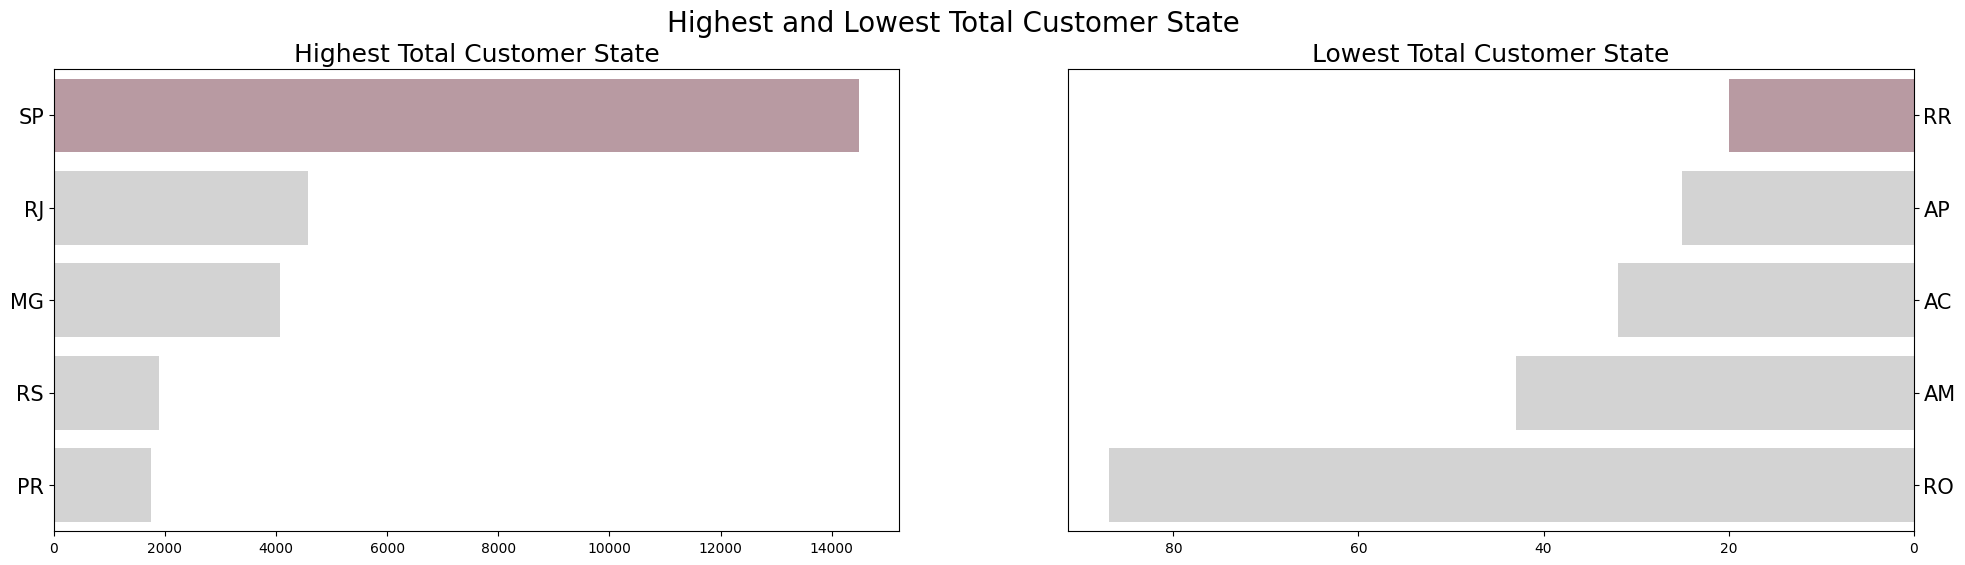

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#BD959F", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Mengurutkan totalcust berdasarkan jumlah pelanggan
totalcust = totalcust.sort_values(by="customer_count", ascending=False)

sns.barplot(x="customer_count", y="customer_state", data=totalcust.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Highest Total Customer State", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(x="customer_count", y="customer_state", data=totalcust.sort_values(by="customer_count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Lowest Total Customer State", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Highest and Lowest Total Customer State", fontsize=20)
plt.show()

In [ ]:
temp = custdemodf.groupby(by=["customer_state", "product_category_name_english"]).agg({
   "customer_id": "count",
    "price": "sum"
})
temp.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
temp = temp.sort_values(by="customer_count", ascending=False)
temp

customer_count  \
customer_state product_category_name_english                             
SP             bed_bath_table                                     1908   
               health_beauty                                      1507   
               sports_leisure                                     1309   
               furniture_decor                                    1275   
               housewares                                         1172   
...                                                                ...   
DF             food_drink                                            1   
MS             home_appliances                                       1   
DF             kitchen_dining_laundry_garden_furniture               1   
               signaling_and_security                                1   
RJ             music                                                 1   

                                                            price  
customer_state product_category_name_english                       
SP             bed_bath_table                           169686.23  
               health_beauty                            171982.71  
               sports_leisure                           136415.80  
               furniture_decor                          106464.33  
               housewares                                96624.41  
...                                                           ...  
DF             food_drink                                   56.90  
MS             home_appliances                              79.90  
DF             kitchen_dining_laundry_garden_furniture     299.00  
               signaling_and_security                       56.00  
RJ             music                                        27.99  

[1114 rows x 2 columns]

In [ ]:
temp = custdemodf.groupby(by=["product_category_name_english"]).agg({
   "customer_id": "count",
})
temp.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
temp = temp.reset_index()  # Reset the index to make "product_category_name_english" a regular column
temp = temp.sort_values(by="customer_count", ascending=False)
temp

,product_category_name_english,customer_count
7,bed_bath_table,11823
43,health_beauty,9975
65,sports_leisure,8945
39,furniture_decor,8744
15,computers_accessories,8082
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


Grafik di bawah disajikan dengan diagram pie berfungsi untuk mengetahui porsi dari frekuensi pembelian tiap produk terhadap frekuensi pembelian seluruh produk. Diagram ini dapat menunjukkan distribusi customer berdasarkan produk yang dibeli sehingga dapat digunakan untuk analisis kebutuhan pasar dan segmen pasar

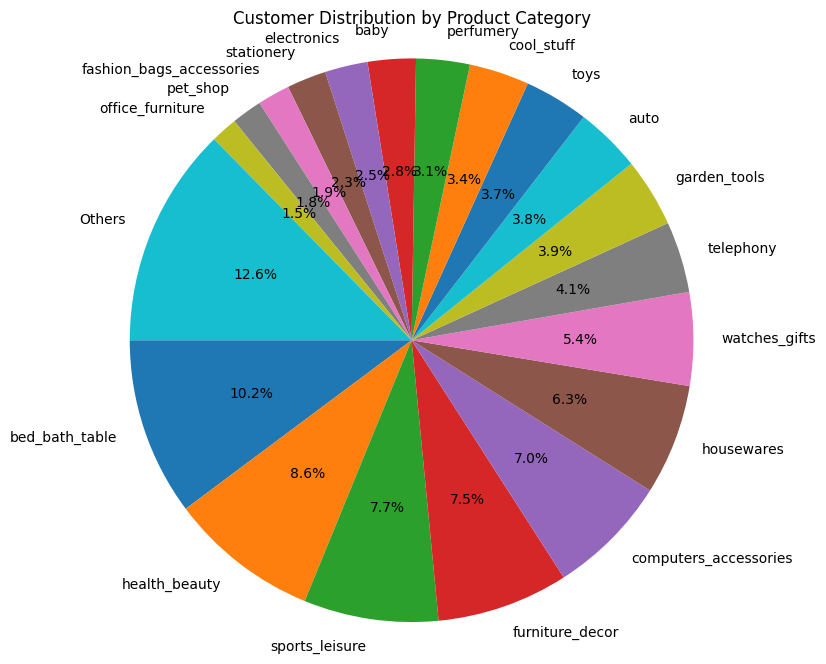

In [ ]:
# Filter out categories with customer_count less than 1%
threshold = 0.015 * temp["customer_count"].sum()
filtered_df = temp[temp["customer_count"] >= threshold]

# Create a new row for "Others" by summing up filtered categories
others_count = temp[temp["customer_count"] < threshold]["customer_count"].sum()
others_df = pd.DataFrame({"product_category_name_english": ["Others"], "customer_count": [others_count]})

# Concatenate filtered categories and "Others"
final_df = pd.concat([filtered_df, others_df])

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(final_df["customer_count"], labels=final_df["product_category_name_english"], autopct='%1.1f%%', startangle=180)
plt.title('Customer Distribution by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

plt.show()

In [ ]:
temp = custdemodf.groupby(by=["product_category_name_english", "customer_state"]).agg({
    "customer_id": "count",
})
temp.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
temp = temp.reset_index()
temp

,product_category_name_english,customer_state,customer_count
0,agro_industry_and_commerce,AL,1
1,agro_industry_and_commerce,AP,1
2,agro_industry_and_commerce,BA,2
3,agro_industry_and_commerce,CE,5
4,agro_industry_and_commerce,GO,2
...,...,...,...
1109,watches_gifts,RS,92
1110,watches_gifts,SC,48
1111,watches_gifts,SE,7
1112,watches_gifts,SP,860


<ipython-input-37-a09c279440dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['product_category_name_english'] = state_data.apply(


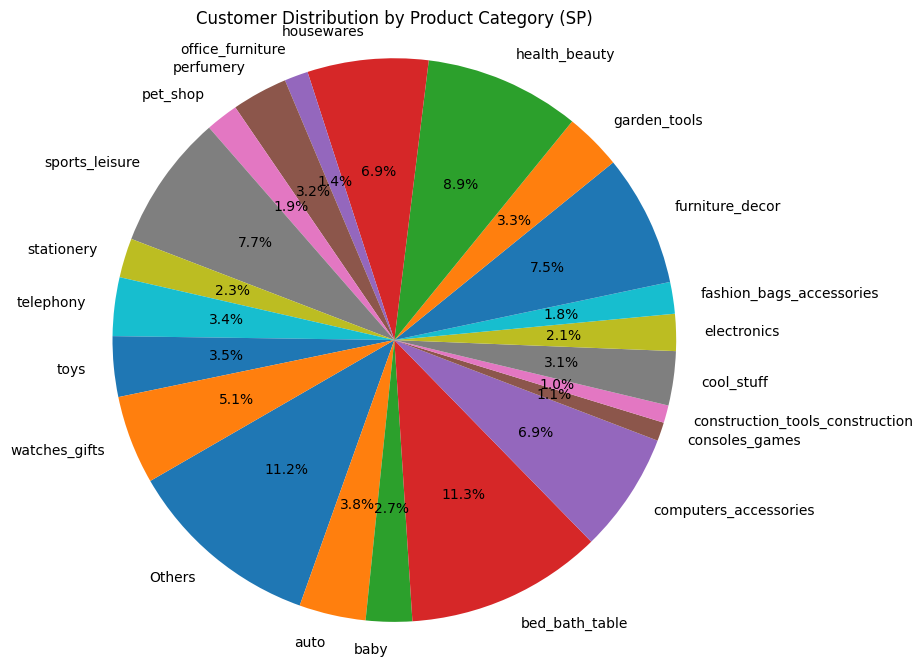

<ipython-input-37-a09c279440dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['product_category_name_english'] = state_data.apply(


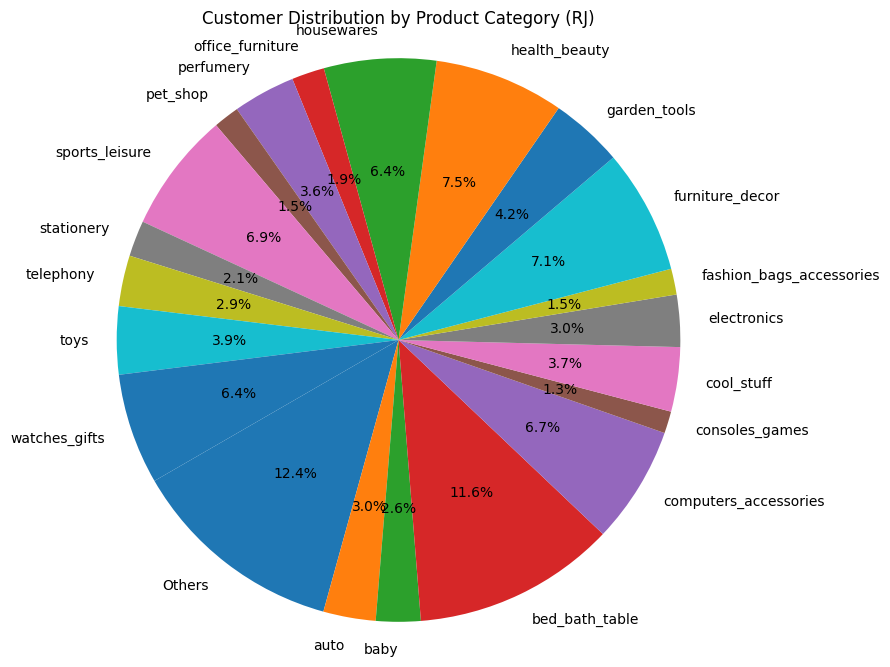

<ipython-input-37-a09c279440dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['product_category_name_english'] = state_data.apply(


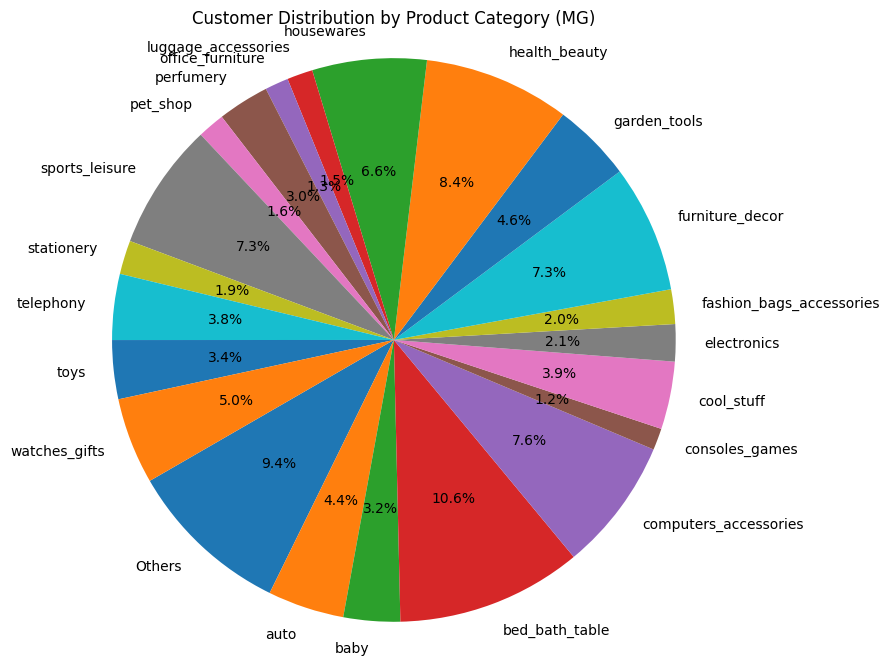

<ipython-input-37-a09c279440dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['product_category_name_english'] = state_data.apply(


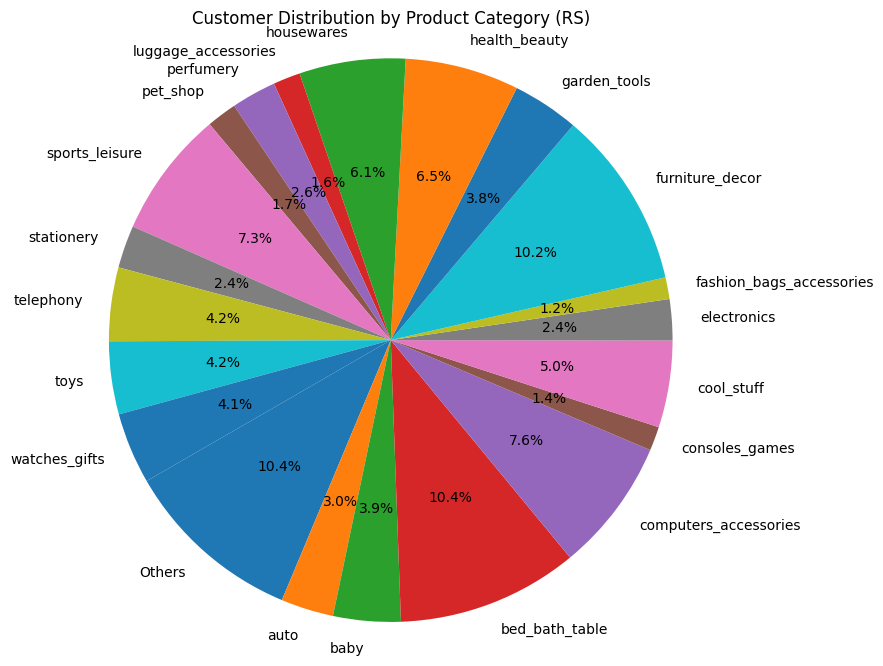

<ipython-input-37-a09c279440dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['product_category_name_english'] = state_data.apply(


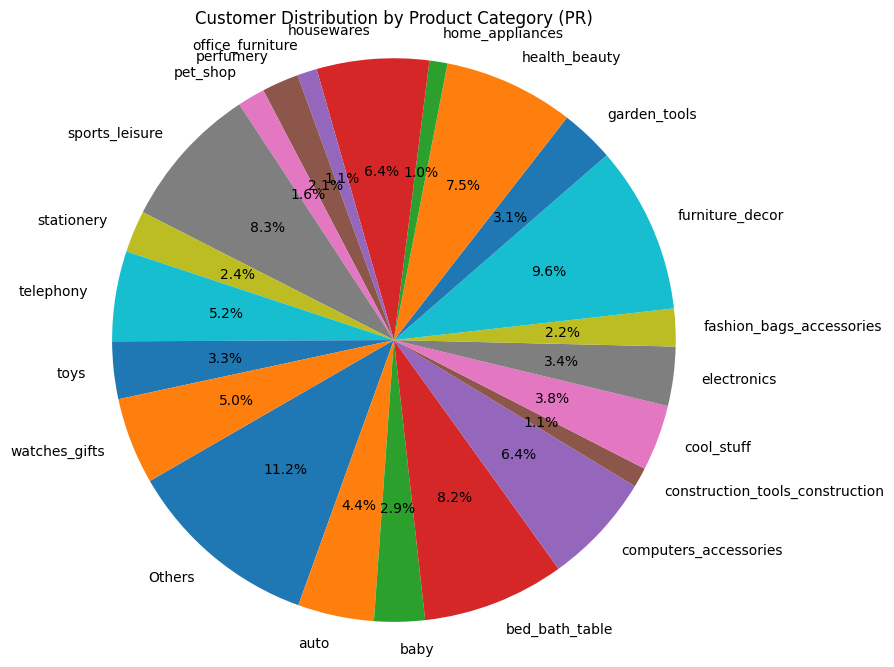

In [ ]:
states = ['SP', 'RJ', 'MG', 'RS', 'PR']

# Create a pie chart for each state
for state in states:
    state_data = temp[temp['customer_state'] == state]

    # Filter out categories with customer_count less than 1%
    threshold = 0.01 * state_data["customer_count"].sum()
    state_data['product_category_name_english'] = state_data.apply(
        lambda row: row['product_category_name_english'] if row['customer_count'] >= threshold else 'Others',
        axis=1
    )

    # Sum categories grouped as 'Others'
    state_data = state_data.groupby('product_category_name_english').agg({'customer_count': 'sum'}).reset_index()

    plt.figure(figsize=(8, 8))
    plt.pie(state_data["customer_count"], labels=state_data["product_category_name_english"], autopct='%1.1f%%', startangle=210)
    plt.title(f'Customer Distribution by Product Category ({state})')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle

    plt.show()


Diagram di bawah bertujuan untuk mencari tau produk apa saja yang paling banyak dibeli oleh customer dari 5 state dengan customer terbanyak. Hasil analisis dapat digunakan untuk mencari tau kebutuhan pasar dan segmentasi pasar

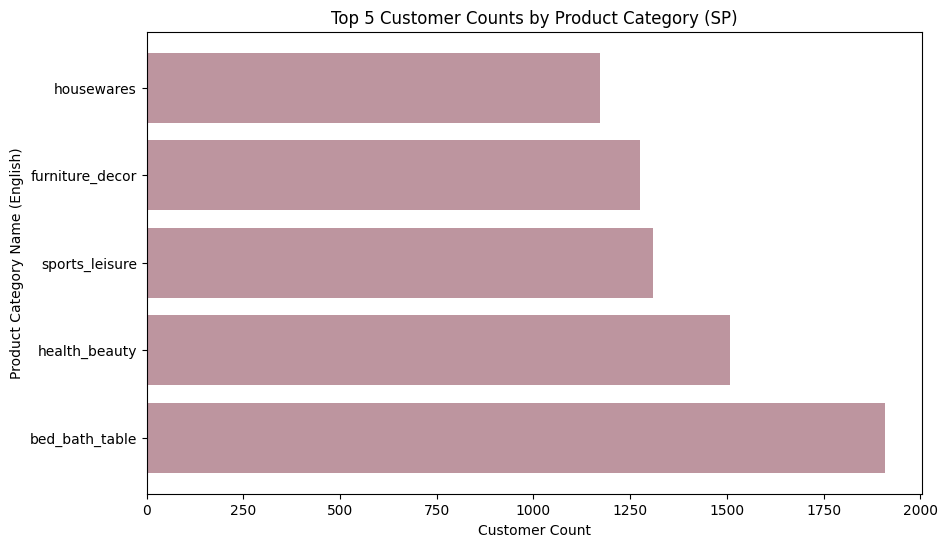

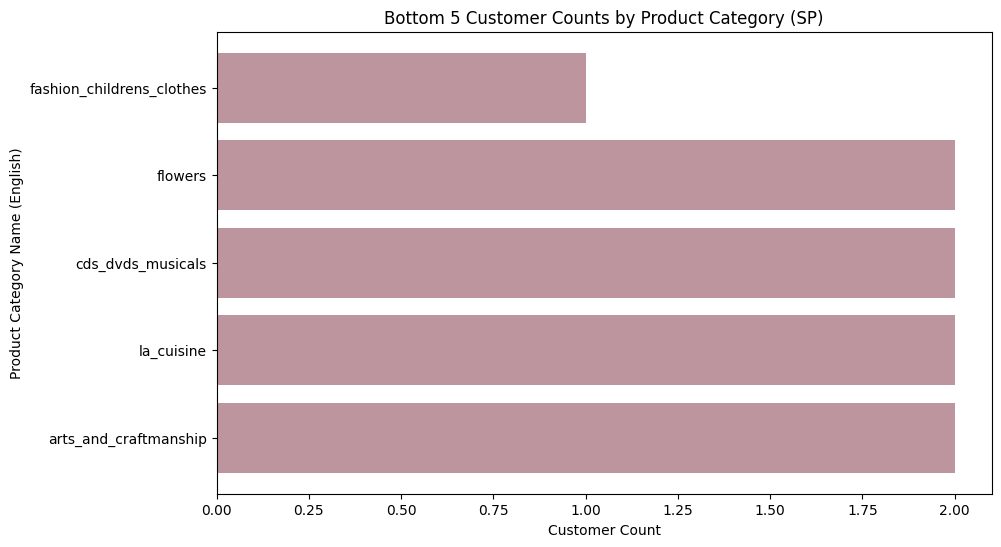

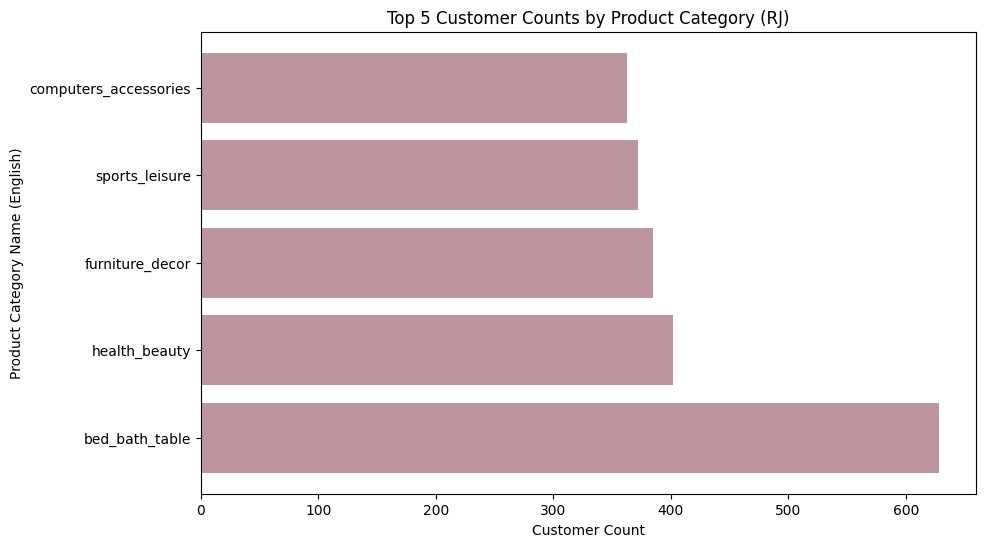

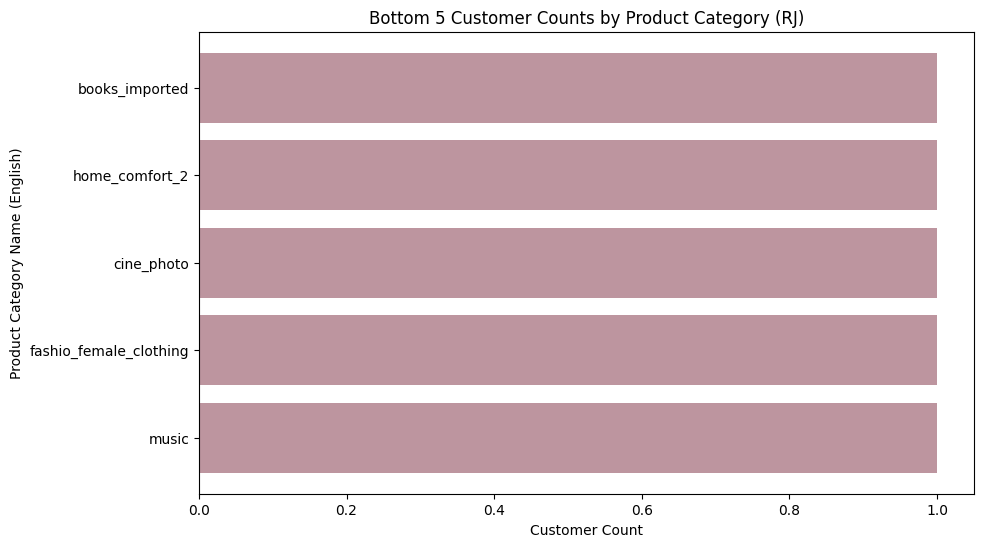

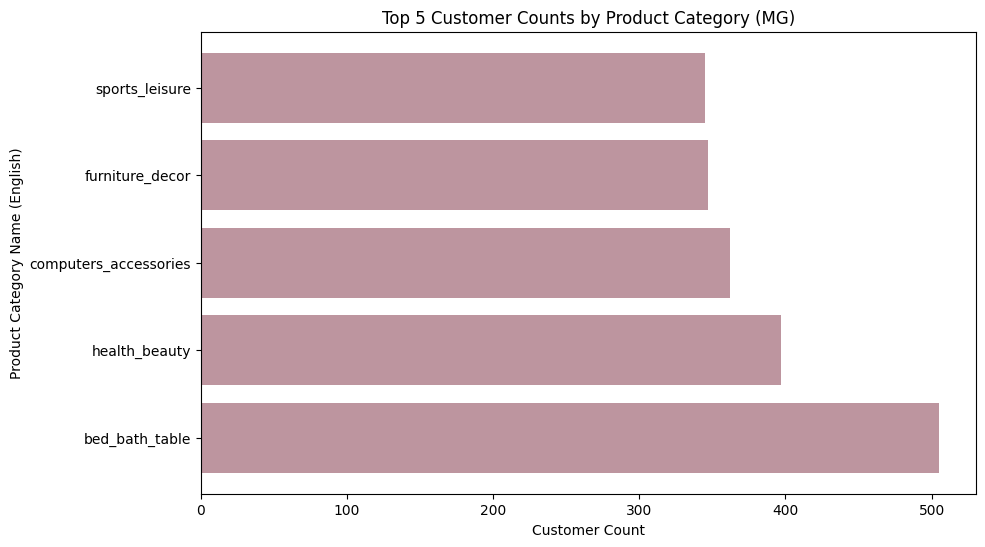

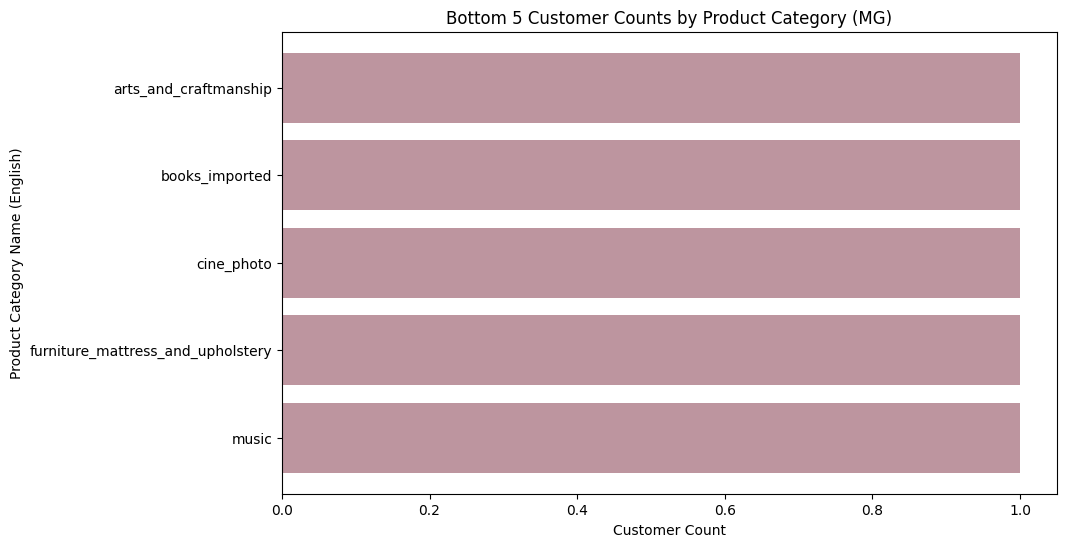

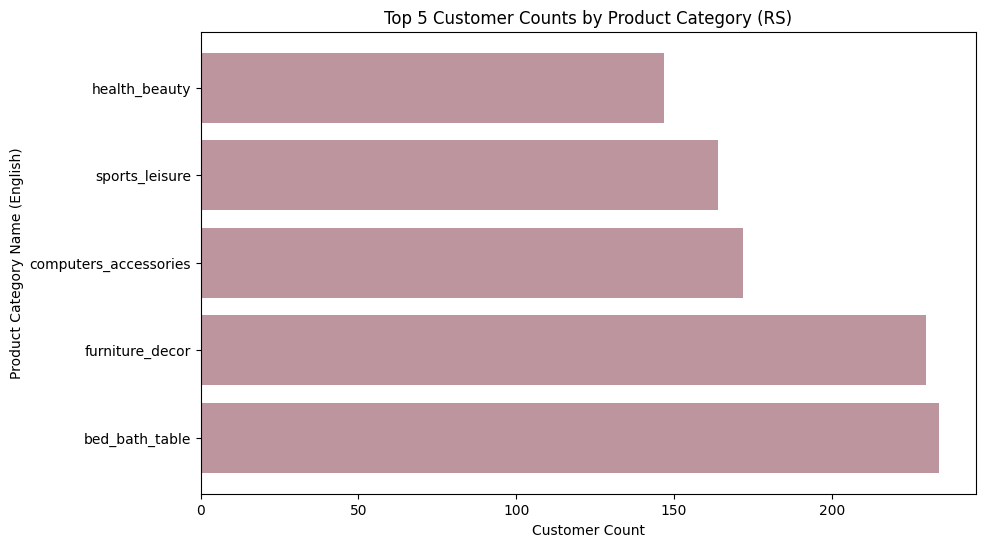

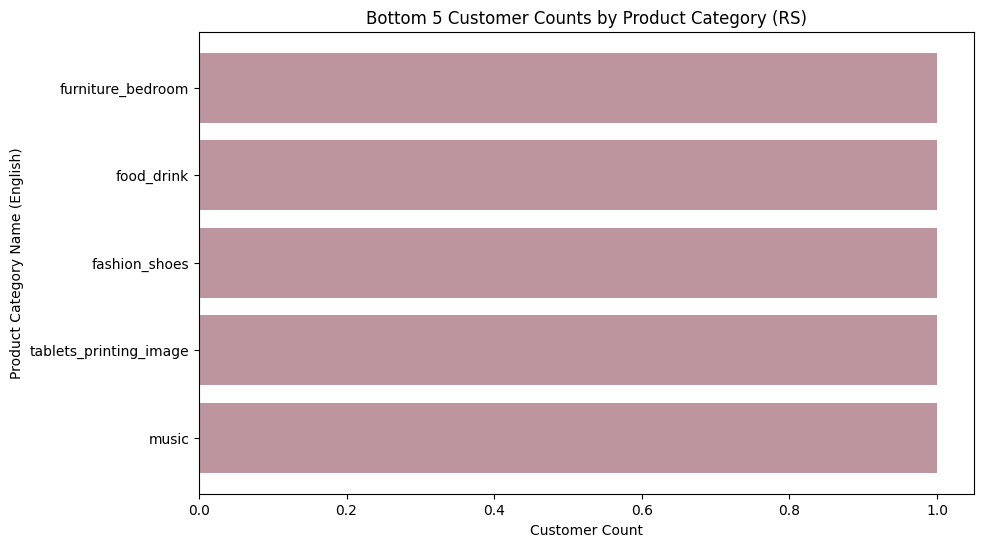

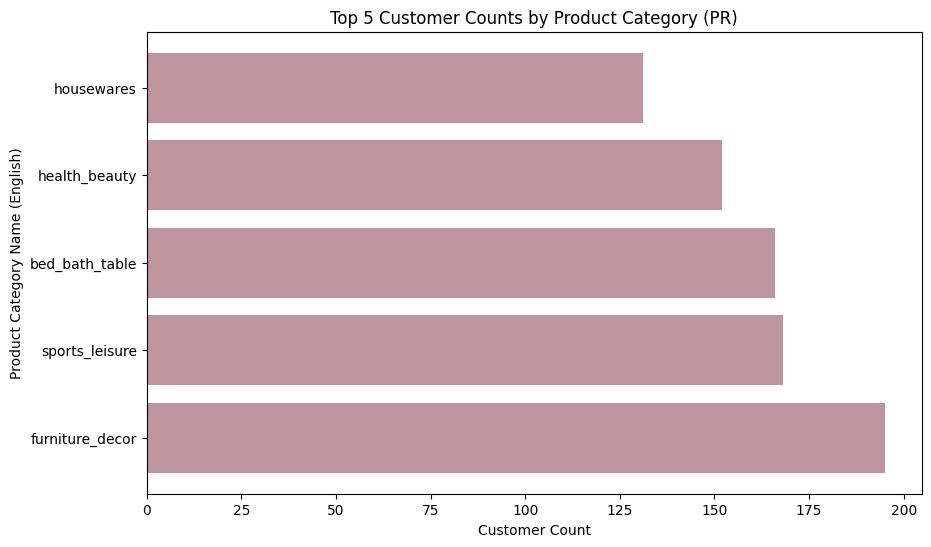

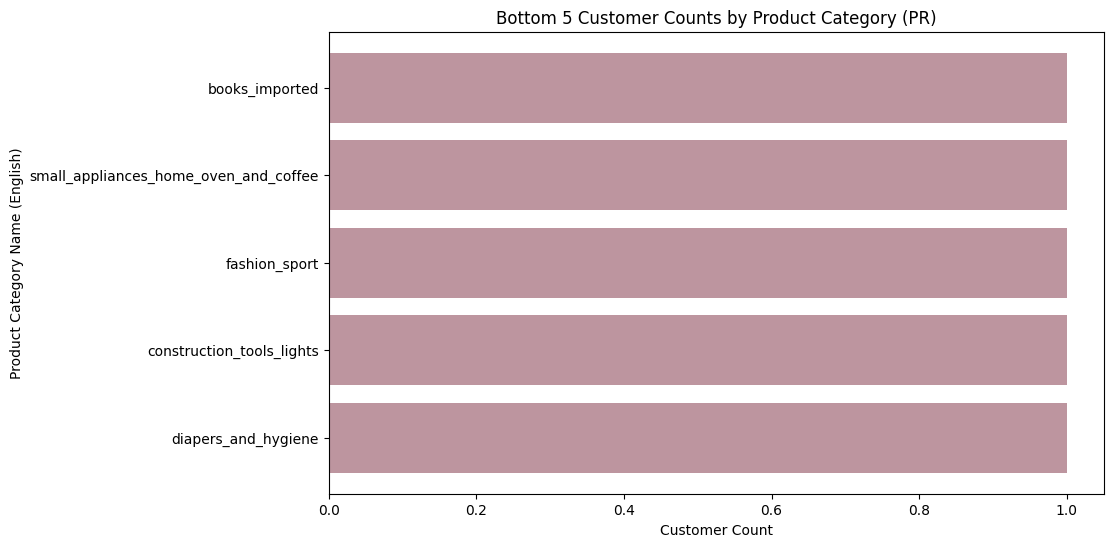

In [ ]:
states = ['SP', 'RJ', 'MG', 'RS', 'PR']

# Create bar diagrams for each state
for state in states:
    state_data = temp[temp['customer_state'] == state]

    # Sort the data by customer_count in descending order
    state_data = state_data.sort_values(by="customer_count", ascending=False)

    # Get the top 5 and bottom 5 categories
    top_5 = state_data.head(5)
    bottom_5 = state_data.tail(5)

    bar_color = "#BD959F"

    # Plot the top 5 categories
    plt.figure(figsize=(10, 6))
    plt.barh(top_5["product_category_name_english"], top_5["customer_count"], color=bar_color)
    plt.title(f'Top 5 Customer Counts by Product Category ({state})')
    plt.xlabel('Customer Count')
    plt.ylabel('Product Category Name (English)')

    plt.show()

    # Plot the bottom 5 categories
    plt.figure(figsize=(10, 6))
    plt.barh(bottom_5["product_category_name_english"], bottom_5["customer_count"], color=bar_color)
    plt.title(f'Bottom 5 Customer Counts by Product Category ({state})')
    plt.xlabel('Customer Count')
    plt.ylabel('Product Category Name (English)')

    plt.show()

### Pertanyaan 2: Bagaimana kontribusi revenue 5 state teratas terhadap keseluruhan state

In [ ]:
revenuedf.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,NaN,NaN,NaN,NaN,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,NaN,NaN,NaN,NaN,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,NaN,NaN,NaN,NaN,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,1.0,credit_card,3.0,179.12


In [ ]:
# From table 1, group by 'customer_state' and sum the 'payment_value' for each state
revenuestates = revenuedf.groupby('customer_state')['payment_value'].sum().reset_index()

# Sort the summary by highest revenue in descending order
revenuestates = revenuestates.sort_values(by='payment_value', ascending=False)
revenuestates.columns = ['State', 'Revenue']
revenuestates

,State,Revenue
25,SP,2053184.08
18,RJ,787378.28
10,MG,650921.93
22,RS,293995.64
17,PR,283071.88
23,SC,217527.79
4,BA,200685.12
6,DF,119128.14
8,GO,117564.53
15,PE,112637.65


In [ ]:
def top_5_revenue_contribution(revenuesum):
    revenuesum = revenuesum.sort_values(by='Revenue', ascending=False)
    top_5_states = revenuesum.head(5)
    top_5_revenue = top_5_states['Revenue'].sum()
    total_revenue = revenuesum['Revenue'].sum()

    revenuecontribution = (top_5_revenue / total_revenue) * 100

    return revenuecontribution

top_5_percentage = top_5_revenue_contribution(revenuestates)
print(f'Percentage of total revenue contribution from the top 5 states: {top_5_percentage:.2f}%')

Percentage of total revenue contribution from the top 5 states: 73.54%


Diagram di bawah memvisualisasikan keuntungan yang didapatkan dari 5 states dengan customer terbanyak

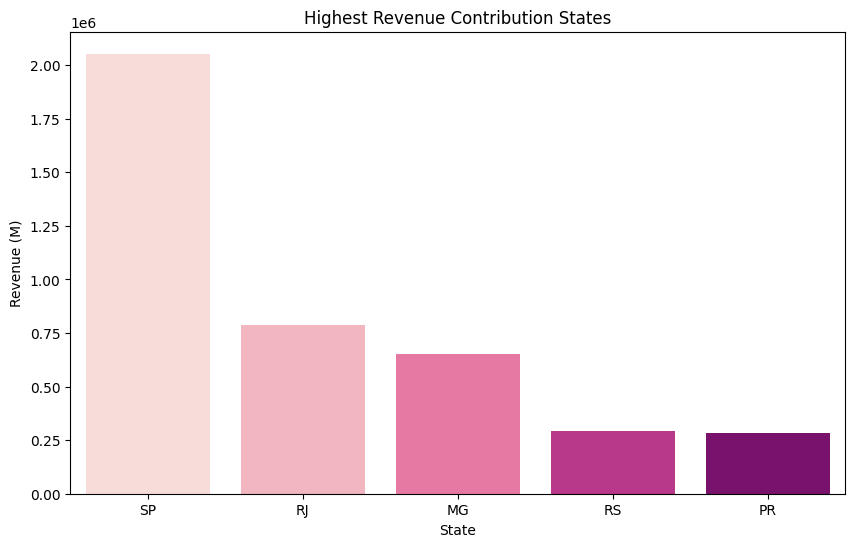

In [ ]:

revenuestates = revenuestates.sort_values(by='Revenue', ascending=False)
top_5_states = revenuestates.head(5)

# Definisikan palet warna gradasi pink mauve
colors = sns.color_palette("RdPu", len(top_5_states))

plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Revenue', data=top_5_states, palette=colors)
plt.title('Highest Revenue Contribution States')
plt.xlabel('State')
plt.ylabel('Revenue (M)')

# Show the plot
plt.show()


In [ ]:
# calculate monthly revenue for specific state per year-month
# Use table 1 (revenue_states), state column and specific states as an input

def calculate_monthly_revenue(revenuedf, state_column, states=None):
    # Filter the DataFrame by state if states are provided
    if states:
        revenuedf = revenuedf[revenuedf[state_column].isin(states)]

    # Extract the year and month from the 'order_purchase_timestamp' column
    revenuedf['year'] = revenuedf['order_purchase_timestamp'].dt.year
    revenuedf['month'] = revenuedf['order_purchase_timestamp'].dt.month

    # Group by year, month, and state (if filtered by state) and sum the revenue
    group_columns = ['year', 'month']
    if state_column in revenuedf.columns:
        group_columns.append(state_column)
    monthlyrevenue = revenuedf.groupby(group_columns)['payment_value'].sum().reset_index()

    # Sort the result by year and month
    monthlyrevenue = monthlyrevenue.sort_values(by=['customer_state', 'year', 'month']).reset_index(drop=True)

    # Create a 'year_month' column as a string for the period and return the result
    monthlyrevenue['year_month'] = monthlyrevenue['year'].astype(str) + '-' + monthlyrevenue['month'].astype(str)
    monthlyrevenue.columns = ['year', 'month', 'state', 'revenue', 'year_month']
    return monthlyrevenue

# Calculate monthly revenue for specific states
monthlyrevenue_SP = calculate_monthly_revenue(revenuedf, 'customer_state', states=['SP'])
monthlyrevenue_RJ = calculate_monthly_revenue(revenuedf, 'customer_state', states=['RJ'])
monthlyrevenue_MG = calculate_monthly_revenue(revenuedf, 'customer_state', states=['MG'])
monthlyrevenue_RS = calculate_monthly_revenue(revenuedf, 'customer_state', states=['RS'])
monthlyrevenue_PR = calculate_monthly_revenue(revenuedf, 'customer_state', states=['PR'])

monthlyrevenue_SP

<ipython-input-43-7a5a22a414c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenuedf['year'] = revenuedf['order_purchase_timestamp'].dt.year
<ipython-input-43-7a5a22a414c3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenuedf['month'] = revenuedf['order_purchase_timestamp'].dt.month
<ipython-input-43-7a5a22a414c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,year,month,state,revenue,year_month
0,2016,9,SP,0.00,2016-9
1,2016,10,SP,7076.54,2016-10
2,2017,1,SP,19140.86,2017-1
3,2017,2,SP,33684.60,2017-2
4,2017,3,SP,53501.69,2017-3
5,2017,4,SP,53406.01,2017-4
6,2017,5,SP,80965.66,2017-5
7,2017,6,SP,68558.85,2017-6
8,2017,7,SP,71713.35,2017-7
9,2017,8,SP,86736.86,2017-8


Grafik tren revenue dari 5 states dengan customer terbanyak di bawah ini dapat digunakan untuk evaluasi strategi pemasaran dan penjualan

In [ ]:
# Create a subplot with 2 rows and 2 columns
fig = make_subplots(rows=3, cols=2, subplot_titles=('Revenue Trend SP', 'Revenue Trend RJ', 'Revenue Trend MG', 'Revenue Trend RS', 'Revenue Trend PR'))

# Add Plotly Express plots to each subplot
fig.add_trace(px.line(monthlyrevenue_SP, x='year_month', y='revenue').data[0], row=1, col=1)
fig.add_trace(px.line(monthlyrevenue_RJ, x='year_month', y='revenue').data[0], row=1, col=2)
fig.add_trace(px.line(monthlyrevenue_MG, x='year_month', y='revenue').data[0], row=2, col=1)
fig.add_trace(px.line(monthlyrevenue_RS, x='year_month', y='revenue').data[0], row=2, col=2)
fig.add_trace(px.line(monthlyrevenue_PR, x='year_month', y='revenue').data[0], row=3, col=1)


# Update subplot titles (optional)
fig.update_layout(title_text='Revenue Trends in 5 Highest Revenue State',
                  autosize=False,
                  width=1000,
                  height=1200,)

# Show the plot
fig.show()

#ANALISIS LANJUTAN

##RFM Analysis <3 : Segmentasi customer

RFM (Recency, Frequency, Monetary) analysis adalah sebuah metode analisis pelanggan yang digunakan untuk mengelompokkan pelanggan berdasarkan tiga faktor utama:
- Recency (R): Menunjukkan seberapa baru pelanggan melakukan pembelian. Semakin baru pembelian dilakukan, semakin tinggi nilai recency-nya.
- Frequency (F): Menunjukkan seberapa sering pelanggan melakukan pembelian. Semakin sering pelanggan bertransaksi, semakin tinggi nilai frequency-nya.
- Monetary (M): Menunjukkan nilai total pembelian yang dilakukan oleh pelanggan. Pelanggan dengan total nilai pembelian yang tinggi akan memiliki nilai monetary yang tinggi.

In [ ]:
orderstatdf = revenuedf.groupby(by="order_status", as_index=False).customer_id.nunique()
orderstatdf

,order_status,customer_id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


Grafik di bawah membandingkan status order pada dataset, status order dapat dijadikan acuan apakah pesanan telah terkirim dengan baik atau ada permasalahan

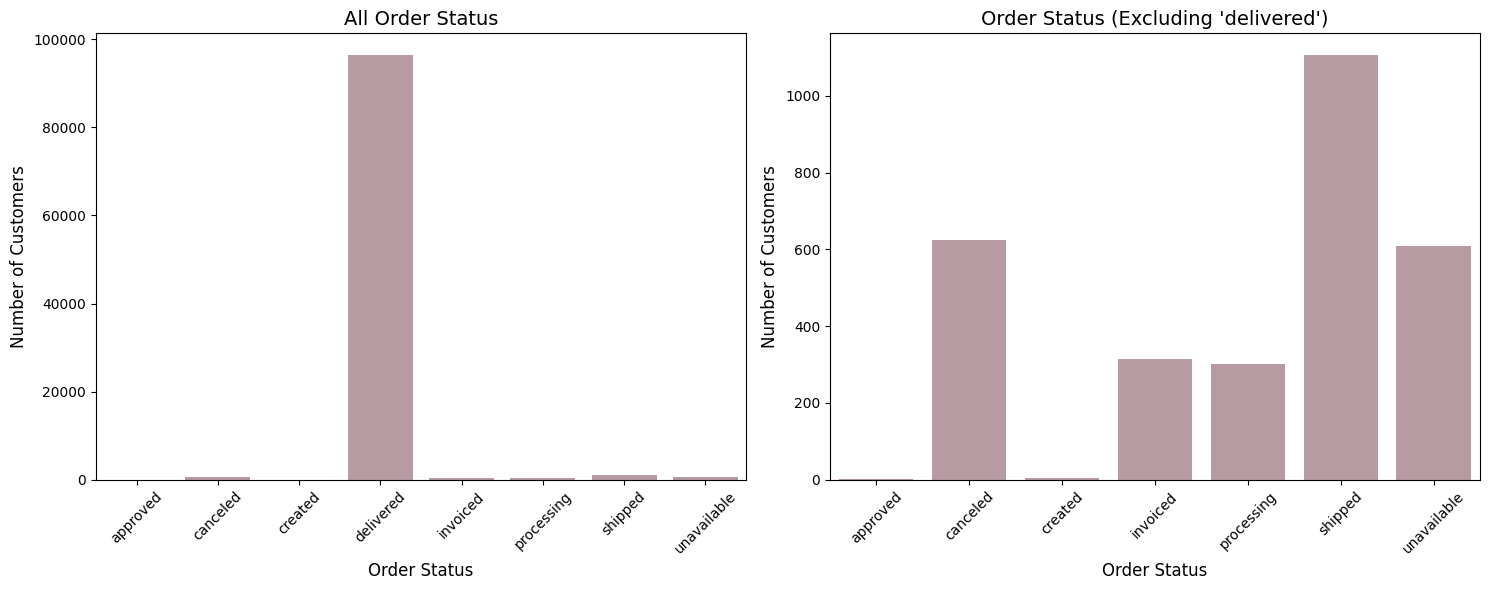

In [ ]:
color = "#BD959F"
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#plot all order status
ax1 = sns.barplot(x="order_status", y="customer_id", data=orderstatdf, palette=[color], ax=axes[0])
ax1.set_xlabel("Order Status", fontsize=12)
ax1.set_ylabel("Number of Customers", fontsize=12)
ax1.set_title("All Order Status", fontsize=14)
ax1.tick_params(axis='x', rotation=45)

#plot without "delivered"
orderstatdf_filtered = orderstatdf[orderstatdf["order_status"] != "delivered"]
ax2 = sns.barplot(x="order_status", y="customer_id", data=orderstatdf_filtered, palette=[color], ax=axes[1])
ax2.set_xlabel("Order Status", fontsize=12)
ax2.set_ylabel("Number of Customers", fontsize=12)
ax2.set_title("Order Status (Excluding 'delivered')", fontsize=14)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
status_values = ['delivered', 'approved', 'created', 'invoiced', 'processing', 'shipped']
filtered_revenuedf = revenuedf[revenuedf['order_status'].isin(status_values)]
rfmdf = filtered_revenuedf.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "payment_value": "sum"
})
rfmdf.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfmdf.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01


In [ ]:
rfmdf["max_order_timestamp"] = pd.to_datetime(rfmdf["max_order_timestamp"])
rfmdf["max_order_timestamp"] = rfmdf["max_order_timestamp"].dt.date
recent_date = revenuedf["order_purchase_timestamp"].dt.date.max()
rfmdf["recency"] = rfmdf["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfmdf.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01,198


In [ ]:
rfmdf.drop("max_order_timestamp", axis=1, inplace=True)
rfmdf.describe()

,frequency,monetary,recency
count,98207.0,98207.000000,98207.000000
mean,1.0,160.264920,289.566589
std,0.0,219.121299,153.244268
min,1.0,0.000000,44.000000
25%,1.0,62.000000,166.000000
50%,1.0,105.280000,271.000000
75%,1.0,176.750000,399.000000
max,1.0,13664.080000,773.000000


In [ ]:
rfmdf.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
28938,4b7decb9b58e2569548b8b4c8e20e8d7,1,166.46,44
33170,56b1ac2855cc6d7950b4ffa6a9b41b0d,1,119.42,49
52692,898b7fee99c4e42170ab69ba59be0a8b,1,93.75,49
26258,448945bc713d98b6726e82eda6249b9e,1,497.25,49
6337,10a79ef2783cae3d8d678e85fde235ac,1,14.29,49


In [ ]:
rfmdf.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
65468,aa58e9d75d589687cbb79699e5118e5e,1,415.54,266
65477,aa5e341090958e5111abe3ba75bcfe87,1,109.12,215
65476,aa5e0a0c36015d39de864189a2b00b09,1,99.33,64
65475,aa5dfb0872b3828aa250acb54d387266,1,229.63,502


Insight yang didapat dari grafik di bawah adalah menunjukkan customer dengan frekuensi, recency, dan monetary teratas pada e commerce, untuk dijadikan acuan bussiness strategist selanjutnya

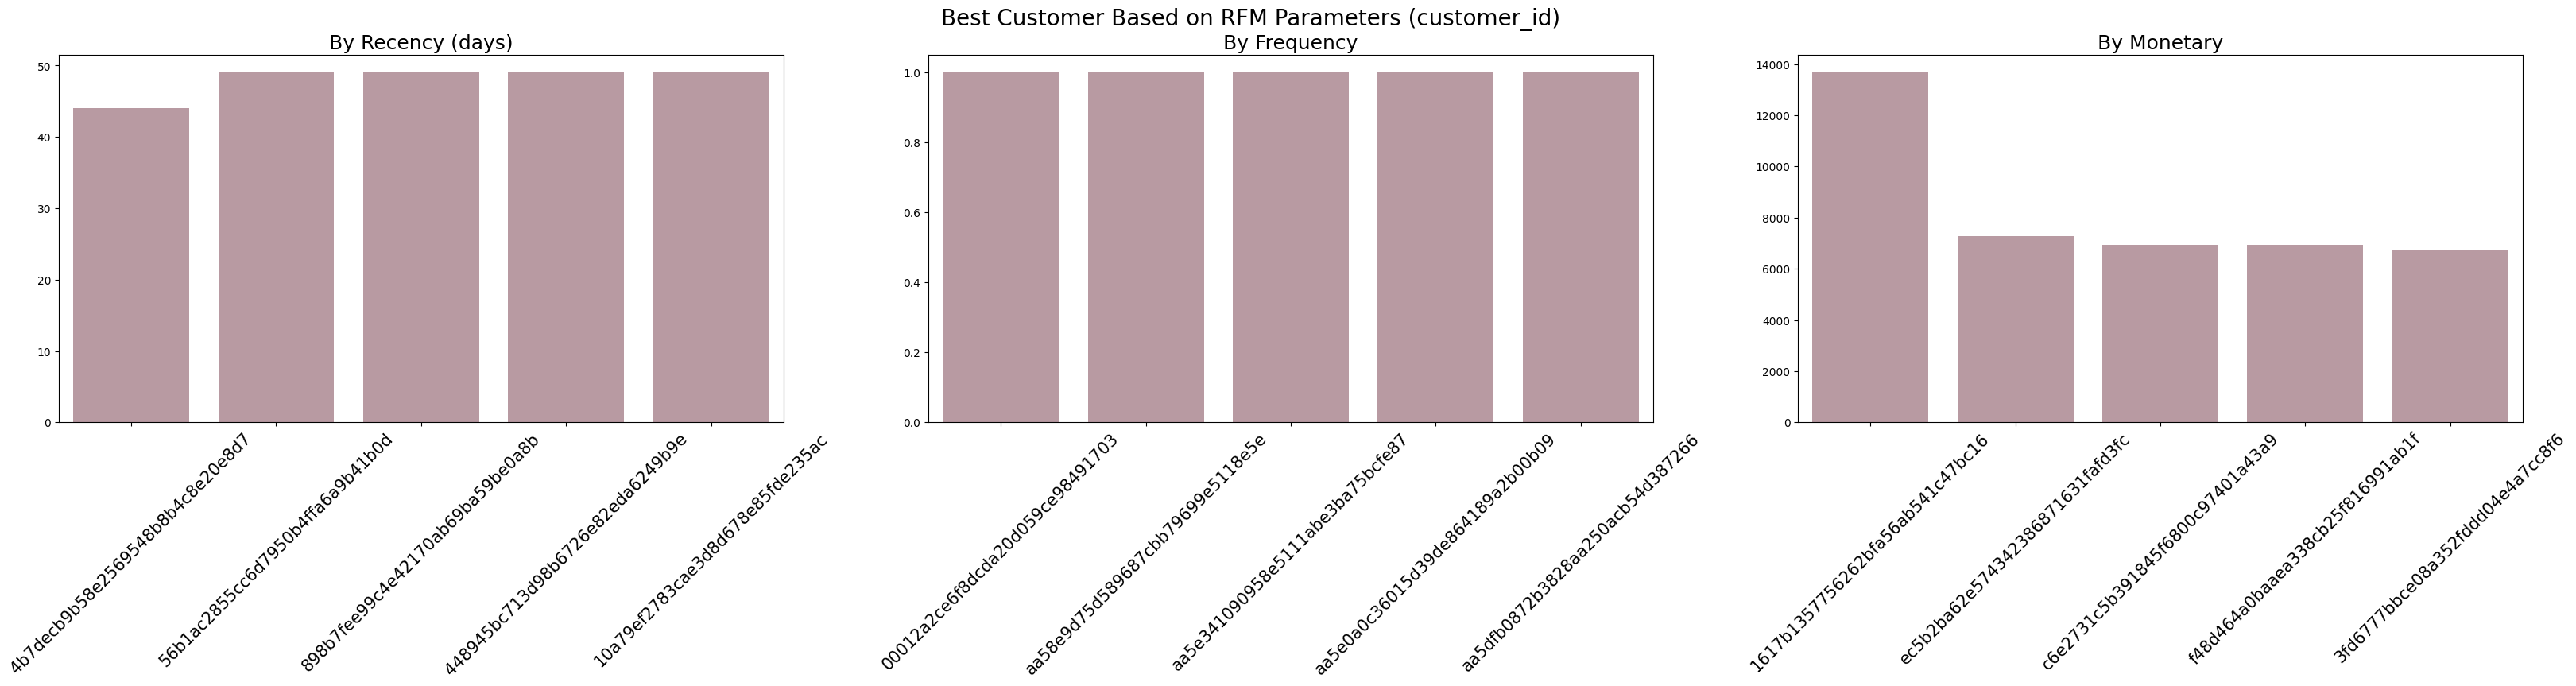

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 6))

colors = ["#BD959F", "#BD959F", "#BD959F", "#BD959F", "#BD959F"]

sns.barplot(y="recency", x="customer_id", data=rfmdf.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelrotation=45, labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfmdf.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelrotation=45, labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfmdf.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelrotation=45, labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [ ]:
rfmdf['r_rank'] = rfmdf['recency'].rank(ascending=False)
rfmdf['f_rank'] = rfmdf['frequency'].rank(ascending=True)
rfmdf['m_rank'] = rfmdf['monetary'].rank(ascending=True)

rfmdf.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337,33734.0,49104.0,53292.5
1,000161a058600d5901f007fab4c27140,1,67.41,458,16524.0,49104.0,28560.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596,2774.5,49104.0,77397.0
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427,20764.5,49104.0,74264.5
4,000379cdec625522490c315e70c7a9fb,1,107.01,198,66002.5,49104.0,50011.5


In [ ]:
# normalizing the rank of the customers
rfmdf['r_rank_norm'] = (rfmdf['r_rank']/rfmdf['r_rank'].max())*100
rfmdf['f_rank_norm'] = (rfmdf['f_rank']/rfmdf['f_rank'].max())*100
rfmdf['m_rank_norm'] = (rfmdf['m_rank']/rfmdf['m_rank'].max())*100

rfmdf.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfmdf.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337,34.349894,100.0,54.265480
1,000161a058600d5901f007fab4c27140,1,67.41,458,16.825685,100.0,29.081430
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596,2.825155,100.0,78.810064
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427,21.143605,100.0,75.620373
4,000379cdec625522490c315e70c7a9fb,1,107.01,198,67.207531,100.0,50.924578


In [ ]:
rfmdf['RFM_score'] = 0.15*rfmdf['r_rank_norm']+0.28 * \
    rfmdf['f_rank_norm']+0.57*rfmdf['m_rank_norm']
rfmdf['RFM_score'] *= 0.05
rfmdf = rfmdf.round(2)
rfmdf[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.20
1,000161a058600d5901f007fab4c27140,2.36
2,0001fd6190edaaf884bcaf3d49edf079,3.67
3,0002414f95344307404f0ace7a26f1d5,3.71
4,000379cdec625522490c315e70c7a9fb,3.36
5,0004164d20a9e969af783496f3408652,2.36
6,000419c5494106c306a97b5635748086,2.33


###Segmentasi customer dengan RFM_score

In [ ]:
rfmdf["customer_segment"] = np.where(
    rfmdf['RFM_score'] > 4.5, "Top customers", (np.where(
        rfmdf['RFM_score'] > 4, "High value customer",(np.where(
            rfmdf['RFM_score'] > 3, "Medium value customer", np.where(
                rfmdf['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfmdf[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.20,Medium value customer
1,000161a058600d5901f007fab4c27140,2.36,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.67,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.71,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.36,Medium value customer
5,0004164d20a9e969af783496f3408652,2.36,Low value customers
6,000419c5494106c306a97b5635748086,2.33,Low value customers
7,00046a560d407e99b969756e0b10f282,3.79,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.73,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [ ]:
customersegmentdf = rfmdf.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customersegmentdf

,customer_segment,customer_id
0,High value customer,15993
1,Low value customers,41362
2,Medium value customer,34272
3,Top customers,5515
4,lost customers,1065


In [ ]:
customersegmentdf['customer_segment'] = pd.Categorical(customersegmentdf['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

Grafik di bawah mevisualisasikan level customer yang dapat digunakan sebagai strategi pemasaran untuk memperbanyak high value dan top value customer

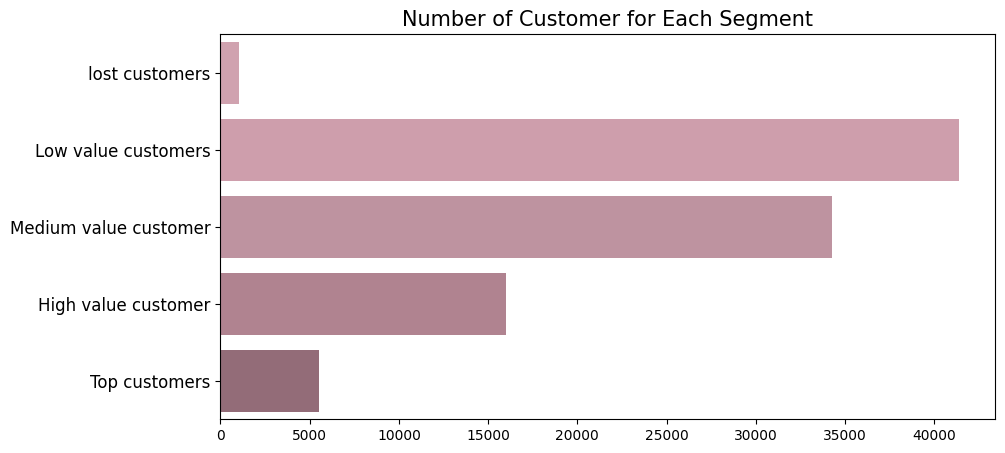

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#D89AAC", "#D696A9", "#C58C9D", "#B87B8D", "#996675"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customersegmentdf.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [ ]:
# all_df = pd.merge(
#     left=revenuedf,
#     right=custdemodf,
#     how="left",
#     left_on="order_id",
#     right_on="customer_id"
# )

all_df = pd.merge(revenuedf, custdemodf, on='order_id', how='outer')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140564 entries, 0 to 140563
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         140564 non-null  object        
 1   customer_id_x                    140564 non-null  object        
 2   order_status_x                   140564 non-null  object        
 3   order_purchase_timestamp_x       140564 non-null  datetime64[ns]
 4   order_estimated_delivery_date_x  140564 non-null  datetime64[ns]
 5   customer_unique_id_x             140564 non-null  object        
 6   customer_zip_code_prefix_x       140564 non-null  int64         
 7   customer_city_x                  140564 non-null  object        
 8   customer_state_x                 140564 non-null  object        
 9   payment_sequential_x             140561 non-null  float64       
 10  payment_type_x                   140561 non-

In [ ]:
all_df = all_df.drop(['customer_id_y', 'order_status_y', 'order_purchase_timestamp_y', 'order_estimated_delivery_date_x', 'customer_unique_id_y', 'customer_zip_code_prefix_y', 'customer_city_y', 'customer_state_y', 'payment_sequential_y', 'payment_type_y', 'payment_installments_y', 'payment_value_y', 'order_item_id', 'seller_id', 'price','freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)
all_df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,payment_sequential_x,payment_type_x,payment_installments_x,payment_value_x,order_estimated_delivery_date_y,product_id,shipping_limit_date,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,2017-10-18,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,2017-10-18,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,2017-10-18,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,2017-10-18,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,2017-10-18,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,housewares


In [ ]:
all_df.to_csv("all_data.csv", index=False)

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140564 entries, 0 to 140563
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         140564 non-null  object        
 1   customer_id_x                    140564 non-null  object        
 2   order_status_x                   140564 non-null  object        
 3   order_purchase_timestamp_x       140564 non-null  datetime64[ns]
 4   customer_unique_id_x             140564 non-null  object        
 5   customer_zip_code_prefix_x       140564 non-null  int64         
 6   customer_city_x                  140564 non-null  object        
 7   customer_state_x                 140564 non-null  object        
 8   payment_sequential_x             140561 non-null  float64       
 9   payment_type_x                   140561 non-null  object        
 10  payment_installments_x           140561 non-

## Conclusion YEAY!!!!

- Dari seluruh data yang telah di analisis, 5 state teratas dengan pelanggan terdaftar terbanyak adalah 'SP', 'RJ', 'MG', 'RS', 'PR'. Data dari ke 5 state tersebut kemudian diolah lebih lanjut untuk menemukan produk yang banyak dibeli di tiap statenya dengan hasil untuk
SP : bed_bath_table, health_beauty, sports_leisure, furniture_decor, housewares
RJ : bed_bath_table, furniture_decor, health_beauty, sports_leisure, computers_accesories
MG : bed_bath_table, health_beauty, computers_accesories, furniture_decor, sports_leisure
RS : bed_bath_table, furniture_decor, computers_accesories, sports_leisure, housewares
PR : furniture_decor, sports_leisure, bed_bath_table, health_beauty, computers_accessories
- Revenue yang dihasilkan memiliki tren naik dengan total revenue contribution 5 states tersebut terhadap keseluruhan states adalah 73,19% dengan highest revenue contribution adalah SP, RJ, MG, RS, dan PR
- Hasil dari segmentasi customer dengan RFM score adalah Low value customer merupakan presentasi komposisi customer tertinggi, diikuti dengan medium value customer, high value customer, top customer, dan lost customer